In [2]:
using DelimitedFiles, FileIO, LinearAlgebra, Statistics
using Plots, LaTeXStrings, JUMD
home = "/home/pbarletta/labo/19/dynein/run"

"/home/pbarletta/labo/19/dynein/run"

In [3]:
function get_exp_bf(infile::String)::Array{Float64, 1}
    name = 13:16
    tempFactor = 61:66
    bf = Array{Float64, 1}()
    pdb = readlines(infile)

    for i = 1:length(pdb)
        if length(pdb[i]) > tempFactor[2]
            if strip(pdb[i][name]) == "CA"
                push!(bf, parse(Float64, strip(pdb[i][tempFactor])))
            end
        end
    end
    return bf
end

get_exp_bf (generic function with 1 method)

## NMA

## NMA vs 1YGT

In [60]:
modes_1ygt = readdlm(joinpath(home, "1ygt/modos/1ygt.mods"))
evals_1ygt = convert(Array{Float64, 1}, readdlm(joinpath(home, "1ygt/modos/1ygt.freq"))[8:end, 1]);

bf_t_1ygt = JUMD.theoretical_bf(modes_1ygt, evals_1ygt)[5:end]
bf_e_1ygt = get_exp_bf(joinpath(home, "1ygt/modos/1ygt.pdb"))[5:end]

gammap = sum(bf_e_1ygt) / sum(bf_t_1ygt)
cor(bf_t_1ygt, bf_e_1ygt)

0.5826572556192062

## NMA vs 3FM7

In [11]:
modes_3fm7 = readdlm(joinpath(home, "3fm7/all/modos/3fm7.mods"))
evals_3fm7 = convert(Array{Float64, 1}, readdlm(joinpath(home, "3fm7/all/modos/3fm7.freq"))[8:end, 1]);

bf_t_3fm7 = JUMD.theoretical_bf(modes_3fm7, evals_3fm7)
bf_e_3fm7 = get_exp_bf(joinpath(home, "3fm7/all/modos/3fm7.pdb"))
gammap = sum(bf_e_3fm7) / sum(bf_t_3fm7)
cor(bf_t_3fm7, bf_e_3fm7)

0.25360244021358536

## NMA vs 2PG1

In [12]:
modes_2pg1 = readdlm(joinpath(home, "2pg1/all/modos/2pg1.mods"))
evals_2pg1 = convert(Array{Float64, 1}, readdlm(joinpath(home, "2pg1/all/modos/2pg1.freq"))[8:end, 1]);

bf_t_2pg1 = JUMD.theoretical_bf(modes_2pg1, evals_2pg1)
bf_e_2pg1 = get_exp_bf(joinpath(home, "2pg1/all/modos/2pg1.pdb"))
gammap = sum(bf_e_2pg1) / sum(bf_t_2pg1)
cor(bf_t_2pg1, bf_e_2pg1)

0.591442571416763

## 2PG1 vs 3FM7

In [8]:
t = get_exp_bf(joinpath(home, "3fm7/all/modos/3fm7.pdb"))
d = get_exp_bf(joinpath(home, "2pg1/all/modos/2pg1.pdb"))

cor(t, d)

0.16947763346030756

In [9]:
tab = get_exp_bf(joinpath(home, "3fm7/ab/modos/ab.pdb"))
dab = get_exp_bf(joinpath(home, "2pg1/ab/modos/ab.pdb"))

cor(tab, dab)

0.22060757270887887

In [10]:
tef = get_exp_bf(joinpath(home, "3fm7/ef/modos/ef.pdb"))
def = get_exp_bf(joinpath(home, "2pg1/ef/modos/ef.pdb"))

cor(tef, def)

0.23358179890400652

In [20]:
modes_2pg1 = readdlm(joinpath(home, "2pg1/ab/modos/ab.mods"))
evals_2pg1 = convert(Array{Float64, 1}, readdlm(joinpath(home, "2pg1/ab/modos/ab.freq"))[8:end, 1]);

bf_t_2pg1 = JUMD.theoretical_bf(modes_2pg1, evals_2pg1)[5:end]
bf_e_2pg1 = get_exp_bf(joinpath(home, "2pg1/ab/modos/ab.pdb"))[5:end]
gammap = sum(bf_e_2pg1) / sum(bf_t_2pg1)
cor(bf_t_2pg1, bf_e_2pg1)

0.5444634554682006

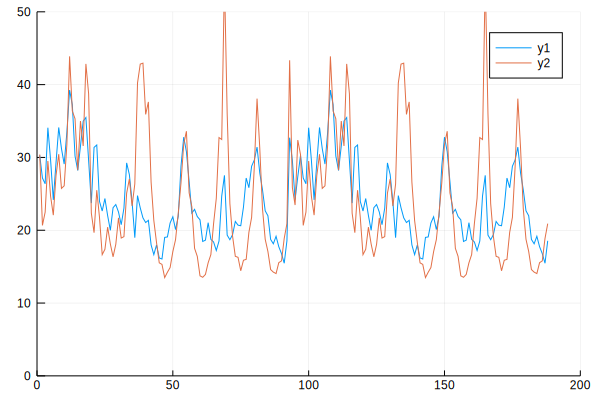

In [62]:
plot(bf_e_1ygt)
plot!(bf_t_1ygt * gammap,
    ylims = (0, 50), xlims = (0, 200))

In [64]:
cor(bf_t_2pg1, bf_e_2pg1)

0.5444634554682006

In [65]:
using Chemfiles

Trajectory(Ptr{Chemfiles.lib.CHFL_TRAJECTORY} @0x000000001026d2d0)

0x000000000000000f

0-element Array{Array{Float64,2},1}

In [85]:
in_trj = Trajectory("/home/pbarletta/labo/19/dynein/data/tctex_pdbs/1xdx.pdb")
in_xyz = Array{Array{Float64,2}, 1}()

for i = 1:nsteps(in_trj)
    in_frm = read(in_trj)
    push!(in_xyz, positions(in_frm))
end



3×3502 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [99]:
xyz = zeros(Float64, size(in_xyz[1])[1], size(in_xyz[1])[2])
for i=1:nsteps(in_trj)
    xyz += in_xyz[i]
end

avg = xyz ./ nsteps(in_trj)

3×3502 Array{Float64,2}:
   1.27639e217   -4.87527    8.24387  …   5.13826   3.04037  2.6602     
   4.88481e129    8.91567    8.99047     26.1599   28.4882   6.38194e216
 -28.1871       -31.8595   -33.6542       6.21718   7.65095  2.4424e129 

In [102]:
in_xyz[1] .- avg

3×3502 Array{Float64,2}:
 -1.27639e217   4.87527  21.3411   …  -16.5163   -14.7264   -15.4992     
 -4.88481e129  -2.83367  -2.44447       1.69707   -2.03625   -6.38194e216
 28.1871       11.6075   14.5682        4.22982    3.81605   -2.4424e129 

In [86]:
in_xyz[2]

3×3502 Array{Float64,2}:
  31.901   31.063   29.889   29.852  …  -9.466  -10.984  -12.483  -11.228
   0.012    1.11     1.421    2.472     29.624   27.153   27.569   28.79 
 -16.401  -16.951  -16.027  -15.388      7.815   10.063    9.23     9.451